In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b




# Question 1:

Assume you are given access to the value and gradient oracles. (Two examples for testing given above called f1 and f2). You are allowed to access the function only through these oracles. 

1. Complete the code for gradient descent with different step size schemes. (one of them given for free)

2. On f1, plot the the error vs iteration and trajectory plots for constant step sizes with the following values of eta: [0.1, 0.2, 0.23]. (20 Iterations should be sufficient)

3. On f1, Plot the error vs iteration and trajectory plots for AG and FR rules. (20 Iterations should be sufficient)

4. On f2, plot the the error vs iteration and trajectory plots for constant step size eta=1.5 with three different random initialisations drawn from N(0,0.01).  (20 Iterations should be sufficient)

5. On f2, Plot the error vs iteration and trajectory plots for AG and FR rules for one random initialisation from N(0,0.01). (20 Iterations should be sufficient)

6. Create a Markdown cell and give your findings for questions 2 and 3 above in them in an itemised list. (For this you may look at the function definitions in the oracle to get an idea).


In [3]:
# Question 1 part 1

def gradient_descent_update(x, eta=1.):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    eta: step size
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with constant step size eta.. 
    
    Notes:
    You are allowed ONLY ONE get_gradient call in this function.
    """
    grad = get_gradient(x)
    return x-eta*grad

def gradient_descent_update_AG(x, c=0.25, c_dash=0.5):
    """
    Arguments:
    x: 1 dimensional numpy array as input. Representing x_t
    c: optional parameter for specifying AG rules. (Upper bound line)
    c_dash: optional parameter for specifying AG rules. (Lower bound line)
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing one Gradient descent step with step size given by AG conditions. 
    
    Notes:
    You are allowed ONLY ONE get_gradient calls in this function.
    """
    n=1
    nl=0
    nh=float('inf')
    old=get_value(x)
    grad=get_gradient(x)
    while True:
        new=x-n*grad
        a=get_value(new)
        b = old- (c*n*np.dot(grad,np.transpose(grad)))
        cq = old- (c_dash*n*np.dot(grad,np.transpose(grad)))
        if a>=cq and a<=b:
            break
        if a<cq:
            nl = n
            n = min(2*n,(nl+nh)/2)
        if a>b:
            nh = n
            n = (nl+nh)/2
    
    return x-n*grad

def gradient_descent_update_FR(x, t=1e-5):
    """
    Arguments:
    x : 1 dimensional numpy array as input. Representing x_t
    tol : tolerance parameter.
    
    Returns:
    x_next: 1-dimensional numpy array with same shape as x. 
    Representing next iterate of Gradient descent step with step size given by full relaxation. 
    You may stop when the line search optimisation problem is solved to a tolerance given by tol.
    
    Notes:
    You are allowed a FEW get_gradient calls in this function. But be careful not to go overboard.
    """
    grad = get_gradient(x)
    n = 1
    while np.dot(get_gradient(x-n*grad),-grad)<0:
        n = n*2
    l = 0
    h = n
    while True:
        if h-l<(2+t)*t:
            break
        pt1 = (l+h)/2 - t
        pt2 = (l+h)/2 + t
        if get_value(x-pt1*grad) < get_value(x-pt2*grad):
            h = pt2
        else:
            l = pt1
    res = (l+h)/2
    return x - res*grad
    
    


    

In [4]:
# Plot / Utility functions

def plot_error_vs_iteration(f_vals, plt_title=None):
    # Plot the loss vs iteration number
    # Argument f_vals is (n)-shape numpy array
    
    plt.figure()

    if plt_title is None:
        plt.title('Function value vs Iteration')
    else:
        plt.title(plt_title)

    plt.xlabel('Iteration : t ')
    plt.ylabel('Value : $f(x_t)$')
    plt.plot(f_vals)


def plot_trajectory(x_list, x_axis=None, y_axis=None, plt_title=None):
    # Trajectory plot for the special case of 2-d functions
    # Generating contour maps of function
    
    # Argument x_list is n by 2 numpy array giving n iterates in 2d. 
    
    delta=0.025
    if x_axis is None:
        x_axis = np.arange(np.min(x_list[:,0])-0.5, np.max(x_list[:,0])+0.5 , delta)
    if y_axis is None:
        y_axis = np.arange(np.min(x_list[:,1])-0.5, np.max(x_list[:,1])+0.5 , delta)

    X, Y = np.meshgrid(x_axis, y_axis)

    Z = np.zeros(X.shape)

    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            input_vec = np.array([X[i,j],Y[i,j]])
            Z[i,j] = get_value(input_vec) 

    levels = np.linspace(Z.min(), Z.max(), 50)

    
    plt.figure(figsize=(10,10.*Z.shape[0]/Z.shape[1]))
    if plt_title is None:
        plt.title('Gradient Descent iterate trajectory')
    else:
        plt.title(plt_title)
        
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.contourf(X, Y, Z, levels=levels, cmap="viridis")
    plt.colorbar()
    # Plot the trajectory
    plt.plot(x_list[:,0],x_list[:,1], marker='o', markersize=10, lw=5)



    

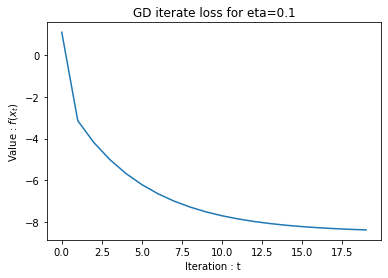

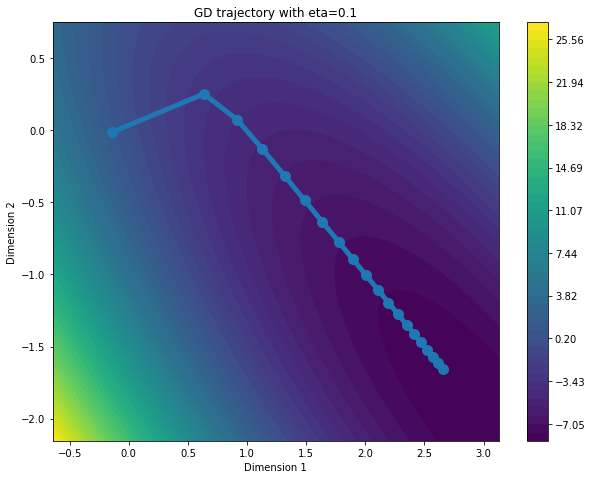

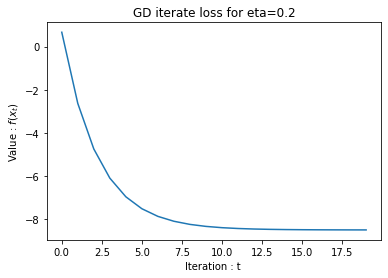

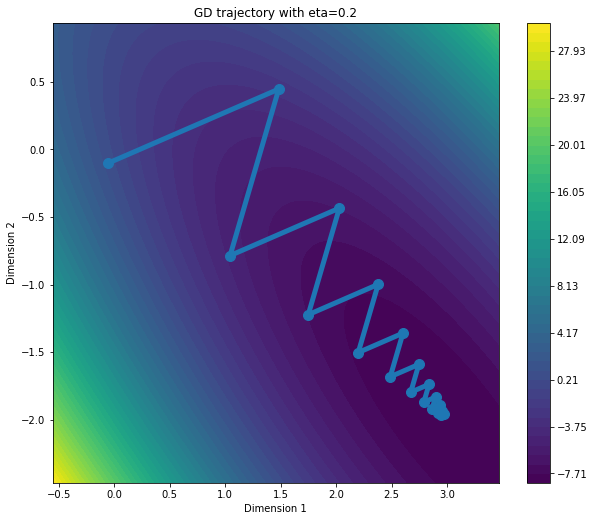

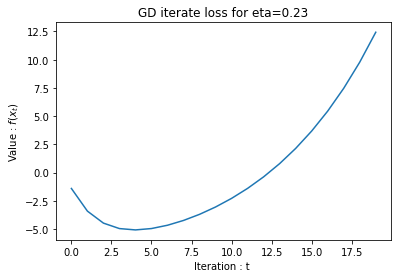

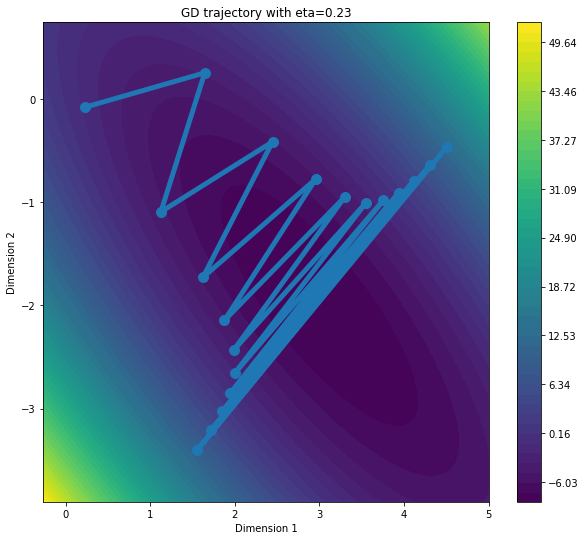

In [5]:
# Question 1 part 2:

for eta in [0.1, 0.2, 0.23]:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

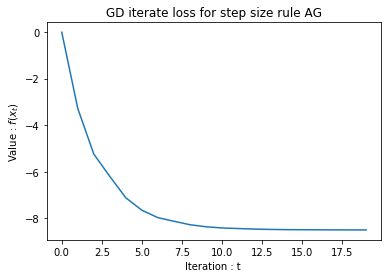

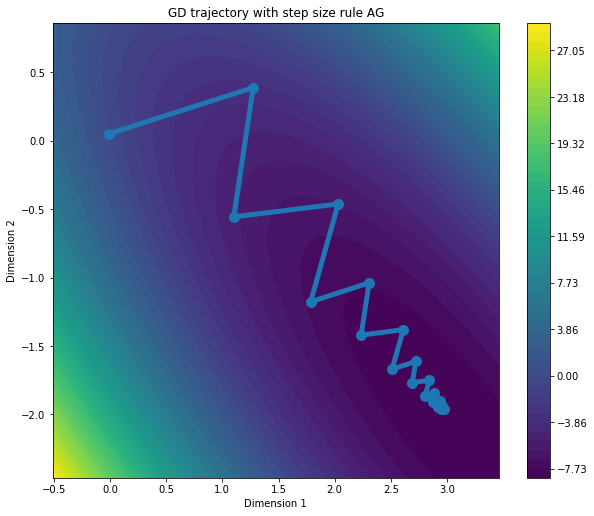

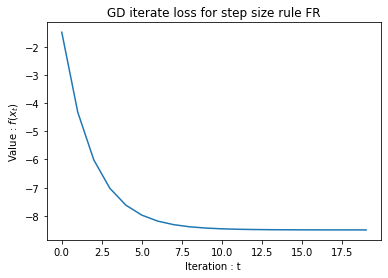

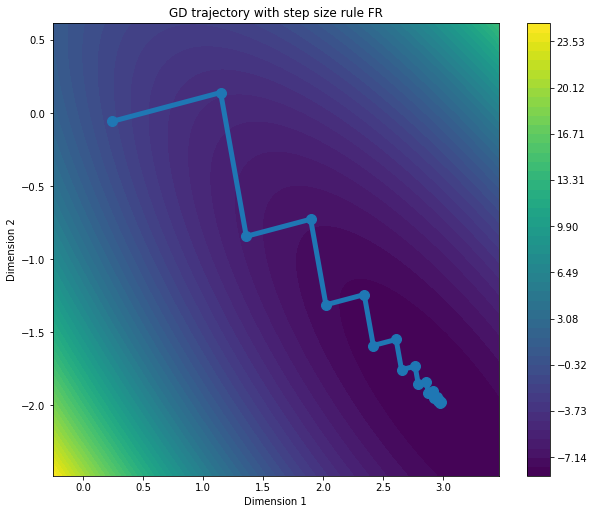

In [6]:
# Question 1 part 3:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x)
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x)
            
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)
    

In [7]:
# Test function 2: Non-convex 2d- function with 2 local minima
n_dim=2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])
    
    return (np.linalg.norm(x-p1)**2)*(np.linalg.norm(x-p2)**2)+ np.dot(g,x) 

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    p1=np.array([0,0.5])
    p2=np.array([-0.5,0])
    g=np.array([0.01,0.01])

    term1= 2*(np.linalg.norm(x-p1)**2)*(x-p2)
    term2= 2*(np.linalg.norm(x-p2)**2)*(x-p1)    
    
    
    return term1+term2+g


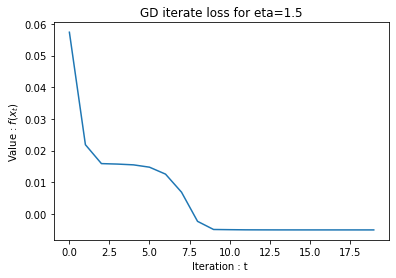

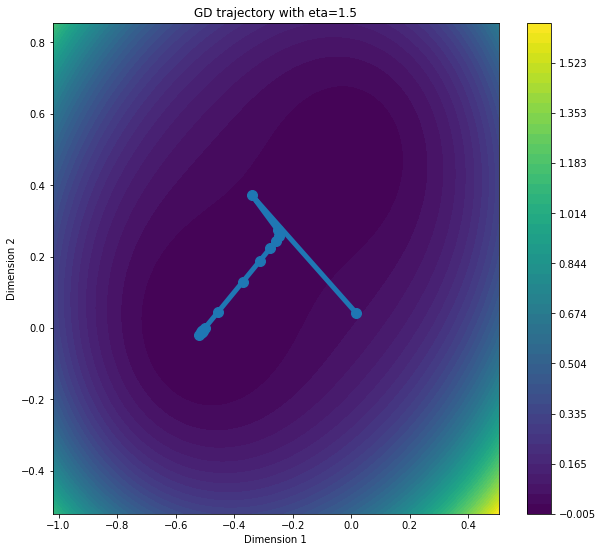

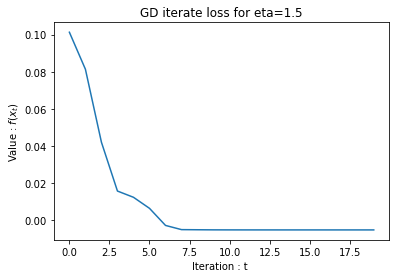

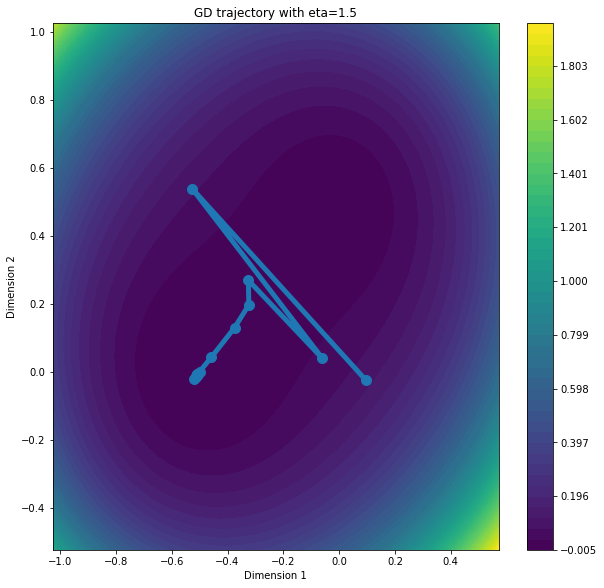

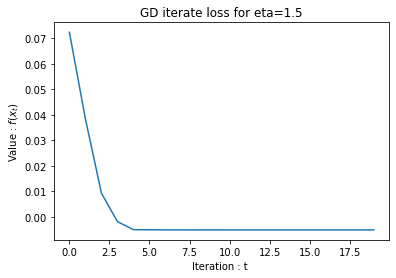

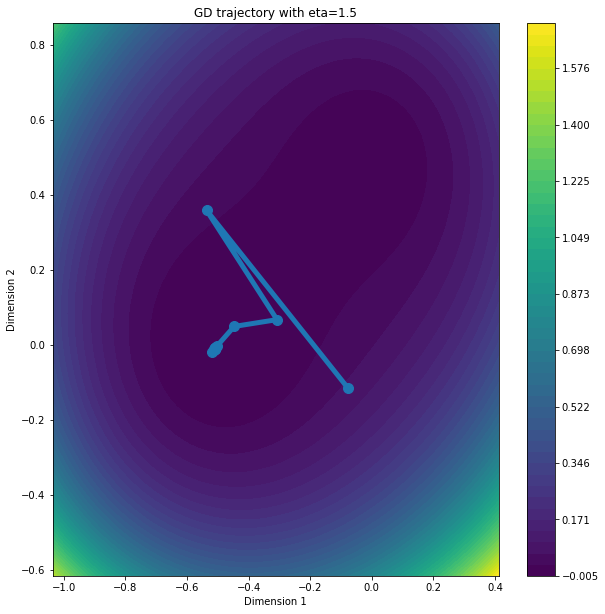

In [9]:
# Question 1, part 4

for eta in [1.5, 1.5, 1.5]:
    f_vals=[]
    x_list=[]
    x=np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):
        x_list.append(x)
        f_vals.append(get_value(x))
        x = gradient_descent_update(x=x, eta=eta)
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))
    

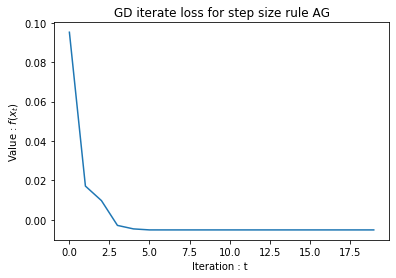

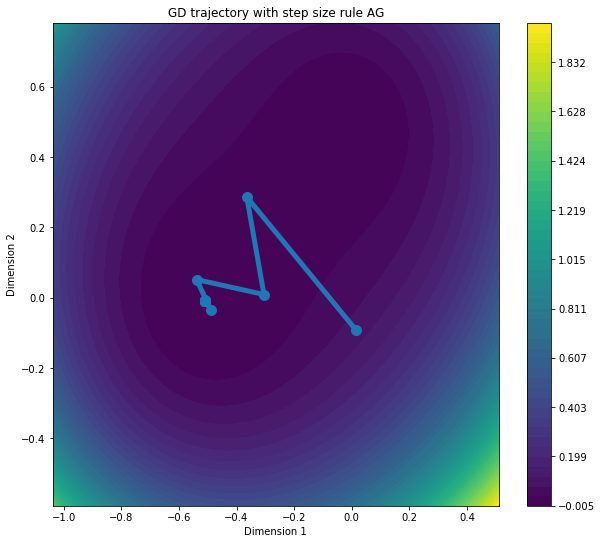

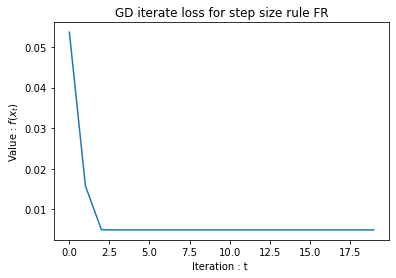

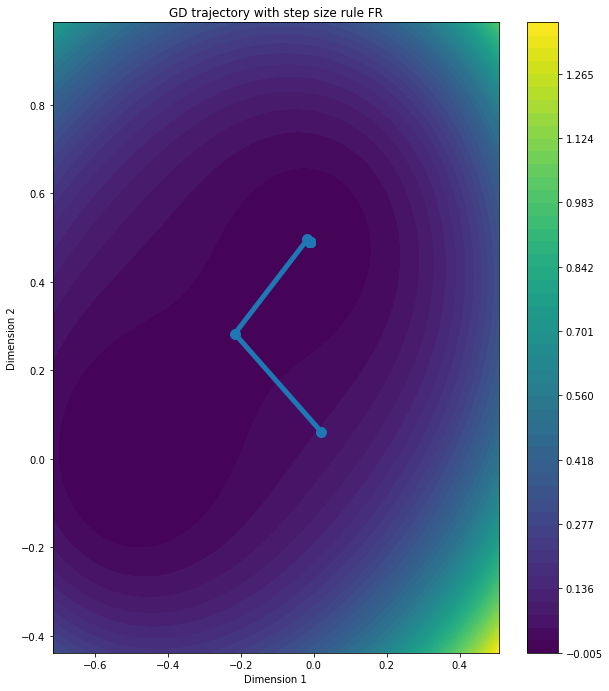

In [10]:
# Question 1 part 5:
for stepsize_rule in ['AG', 'FR']:
    f_vals=[]
    x_list=[]
    x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1

    f_vals = []
    for t in range(20):

        x_list.append(x)
        f_vals.append(get_value(x))
        if stepsize_rule=='AG':
            x = gradient_descent_update_AG(x=x)
        elif stepsize_rule=='FR':
            x = gradient_descent_update_FR(x=x)
            
    x_list = np.array(x_list)


    plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for step size rule '+stepsize_rule)

    if n_dim==2:
        plot_trajectory(x_list, plt_title='GD trajectory with step size rule '+ stepsize_rule)

### Question 1 part 6
2-
eta=0.1:
    function value converges to minimum, function decreases in every iteration, gradient direction remains smae after some iterations

eta=0.2:
    function value converges to minimum, function decreases in every iteration but unlike eta=0.1 the gradient changes direction for different iterations

eta=0.23:
    fucntion value first decreases then it starts increasing but the function value doesn't converge to minimum in the last iterations the fucntion oscillates between two values. Gradient direction changes at every iteration but in the last iteration same as function value it switches between two opposite directions
    
3-
Armijo-goldstein:
    fucntion value decreses for every iteratin and also converges and also gradient direction changes for each iterations, it is slower than full relaxation

Full relaxation:
    fucntion value decreses for every iteratin and also converges and also gradient direction changes  for each iterations, for a given gradient direction the function takes minimum value, it is faster than Armijo-goldstein

# Question 2:

Assume you are given a value and gradient oracle to a quadratic function. Minimise this using only the oracle.

1. Write the Conjugate gradient algorithm update rule.
2. Run on f1 and generate error plot and trajectory plots. (Create a new cell for this.)
3. On a given 100-dimensional convex quadratic plot f(x_t) vs t for both Gradient descent (with full relaxation) and CGD for 20 iterations.
4. Explain your findings in a new markdown cell.


In [11]:
#Question 2, part 1

def CG_update(x_t, d_t):
    
    """
    Arguments:
    x_t : 1 dimensional numpy array as input. Representing current iterate x_t
    d_t: represents the current direction of movement. (d_t)

    Returns:
    x_next: numpy array with same shape as x_t, representing x_{t+1}
    d_next: numpy array with same shape as d_t, representing d_{t+1}
    
    x_next corresponds to one Conjugate gradient descent step with step size given by full relaxation. 
    You may assume the function that you have oracle access to is a quadratic. But you don't know A or b. 
    You only have access to the oracles.
    
    You need to figure out how to get the required quantities like r_t, v^T A v using zeroth and first order oracles.
    
    Notes:
    You are allowed at most three get_gradient calls in this function. 
    """
    r_t = -get_gradient(x_t)
    q = 2*(get_value(d_t) + np.dot(-get_gradient(np.zeros(len(x_t))),d_t))
    a = np.dot(np.transpose(r_t),d_t)/q
    xn = x_t + a*d_t
    r_next = -get_gradient(xn)
    b = np.dot(r_next,r_next)/np.dot(r_t,r_t)
    d_next = r_next + b*d_t
    
    return xn,d_next


In [11]:
# Test function 1: Convex 2d- Quadratic
n_dim = 2
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.array([[5.,4],[4.,5.]])
    b=np.array([7.,2.])
    return np.dot(A,x) - b

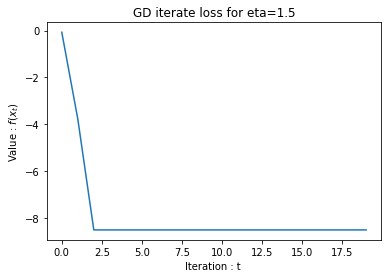

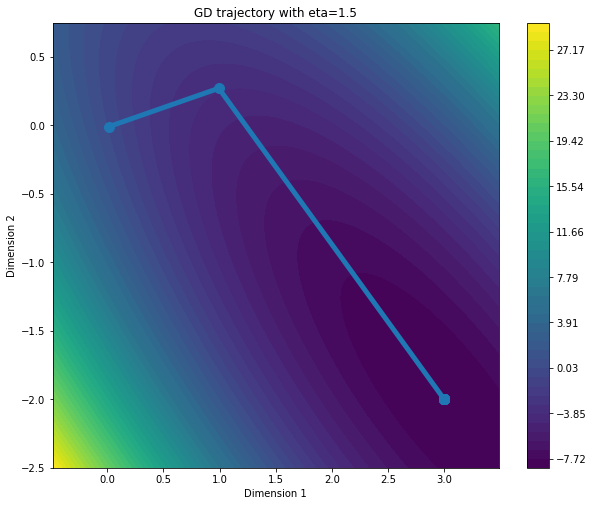

In [13]:
# Question 2, part 2

f_vals=[]
x_list=[]

x=np.zeros((n_dim))+np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)

f_vals = []
for t in range(20):
    x_list.append(x)
    f_vals.append(get_value(x))    
    x, d = CG_update(x, d)
x_list = np.array(x_list)


plot_error_vs_iteration(f_vals, plt_title='GD iterate loss for eta='+str(eta))

if n_dim==2:
    plot_trajectory(x_list, plt_title='GD trajectory with eta='+str(eta))





In [14]:
# Test function 3: Convex 100d- Quadratic
n_dim = 100
def get_value(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    f(x) : a scalar
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return 0.5*np.dot(x, np.dot(A,x)) - np.dot(b,x)

def get_gradient(x):
    """
    Arguments:
    x: 1 dimensional numpy array as input.
    
    Returns:
    grad f(x) : numpy array with same 1-dimensional shape as input x
    """
    A=np.diag(np.arange(1.,n_dim+1.,1.))
    b=np.arange(1,n_dim + 1., 1.)
    return np.dot(A,x) - b

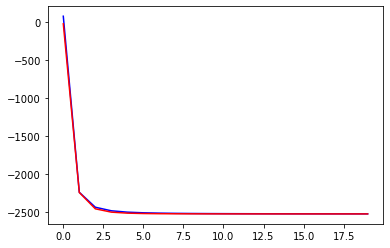

In [15]:
# Question 2, part 3

f_vals_GD=[]
x=np.random.randn(n_dim)*0.1
for t in range(20):
    f_vals_GD.append(get_value(x))
    x = gradient_descent_update_FR(x=x)

f_vals_CGD=[]
x=np.random.randn(n_dim)*0.1
d=-1*get_gradient(x)
for t in range(20):
    f_vals_CGD.append(get_value(x))
    x, d = CG_update(x,d)
    
plt.plot(range(20),f_vals_GD, 'b-', range(20), f_vals_CGD, 'r-')



### Question 2, part 4:
Conjugate Gradinet Descent:
    -function achieves minimum value after 2 iters
    
    -function decreases every iter
    
    -for a given gradient direction the function value will be minimum
    
    -Gradient directions are along the eigen vectors of A matrix
     
